In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\raghu\Downloads\Veera DS\DSC630\diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
# Check for missing values
data.isnull().sum()

# Basic data cleaning steps
# For demonstration purposes, let's drop rows with any missing values
data_cleaned = data.dropna()

# Check for duplicates
data_cleaned.duplicated().sum()

# Drop duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Summary of cleaned data
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
# Summary statistics
data_cleaned.describe()

# Specific statistics for readmission-related columns
data_cleaned['readmitted'].value_counts()
data_cleaned['age'].value_counts()


[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

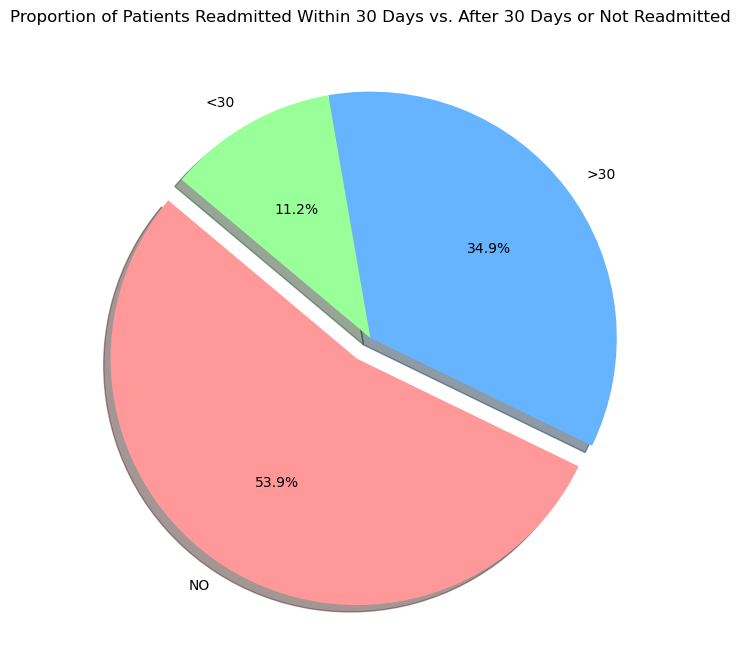

In [4]:
readmission_counts = data_cleaned['readmitted'].value_counts()

# Create a pie chart
import matplotlib.pyplot as plt
labels = readmission_counts.index
sizes = readmission_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode the first slice (readmitted < 30 days)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Patients Readmitted Within 30 Days vs. After 30 Days or Not Readmitted')
plt.show()

In [5]:
for i in data_cleaned.head():
    print(i)

encounter_id
patient_nbr
race
gender
age
weight
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
payer_code
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


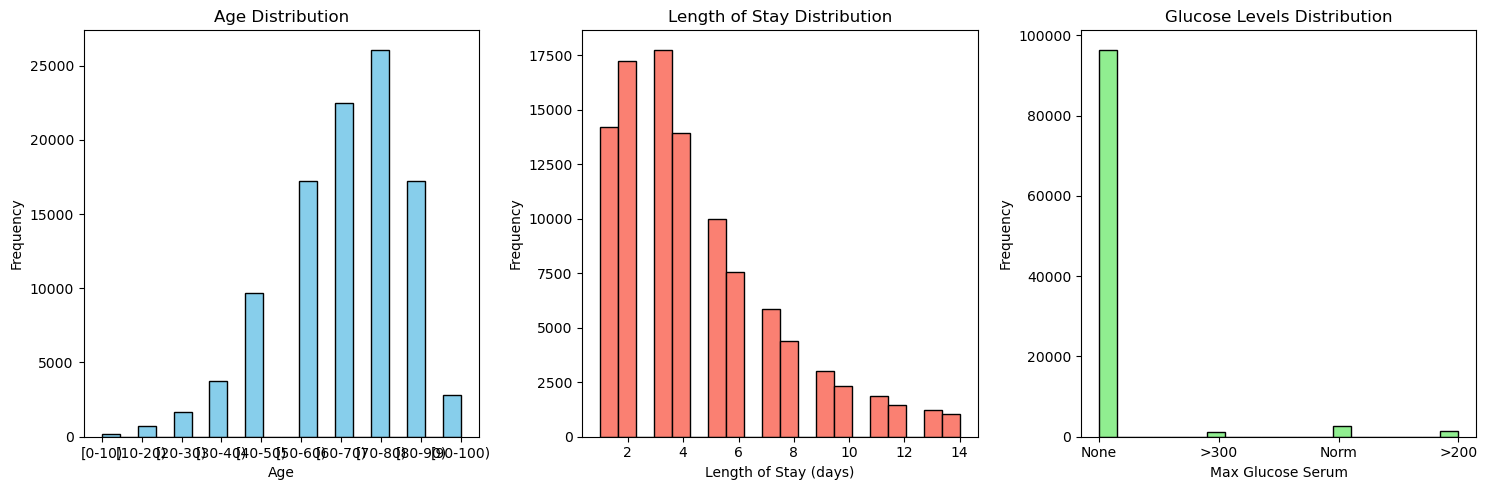

In [6]:
# Plot histograms for continuous variables
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
plt.hist(data_cleaned['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Length of Stay
plt.subplot(1, 3, 2)
plt.hist(data_cleaned['time_in_hospital'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')

# Glucose Levels (Assuming max_glu_serum is a continuous measure)
plt.subplot(1, 3, 3)
plt.hist(data_cleaned['max_glu_serum'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Glucose Levels Distribution')
plt.xlabel('Max Glucose Serum')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

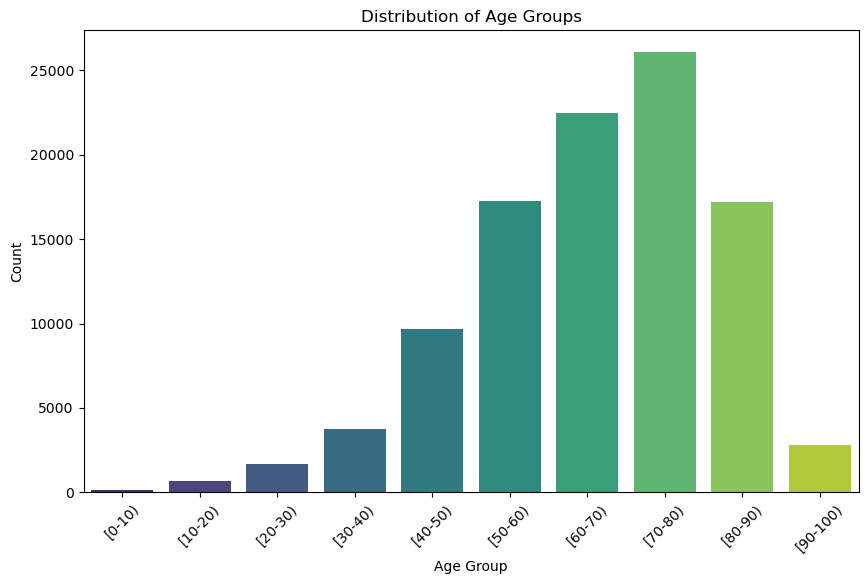

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='age', palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




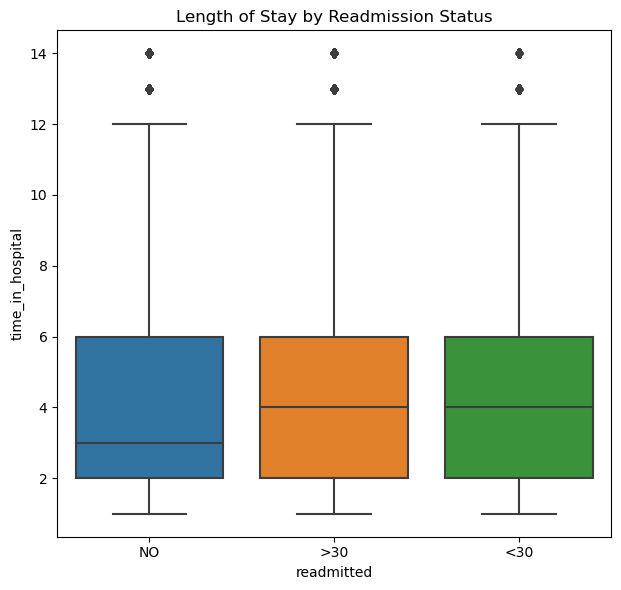

In [8]:
plt.figure(figsize=(12, 6))



# Boxplot for length of stay
plt.subplot(1, 2, 2)
sns.boxplot(x='readmitted', y='time_in_hospital', data=data_cleaned)
plt.title('Length of Stay by Readmission Status')

plt.tight_layout()
plt.show()

This plot shows the distribution of patients across different age groups. It helps us understand which age groups are most represented in the dataset.

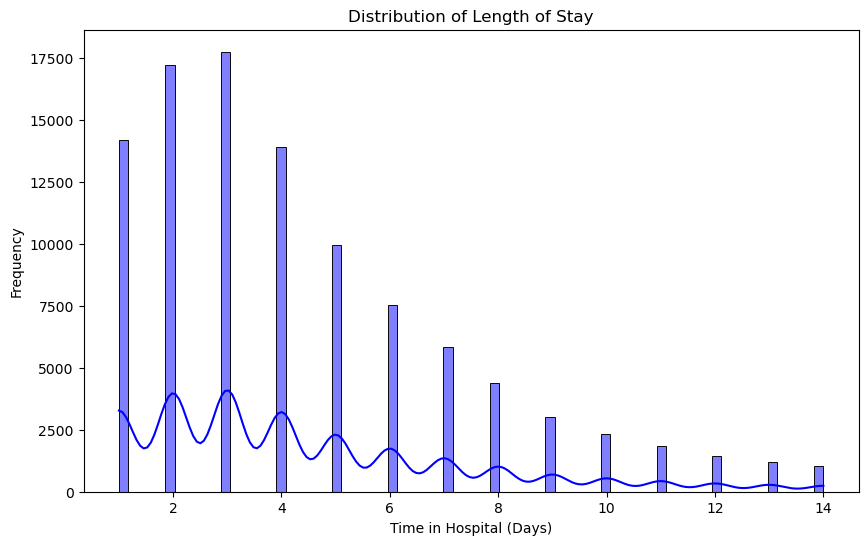

In [9]:
# Length of Stay Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='time_in_hospital', kde=True, color='blue')
plt.title('Distribution of Length of Stay')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of the length of hospital stays. The KDE line provides a smoothed estimate of the distribution. The length of stay distribution plot helps in understanding how long patients typically stay in the hospital, which can be related to readmission risks.

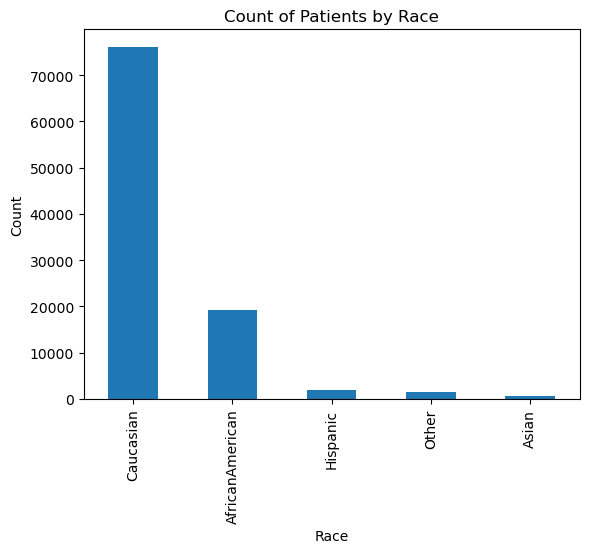

In [10]:
race_counts = data[data['race']!='?']['race'].value_counts()

race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Count of Patients by Race')
plt.show()

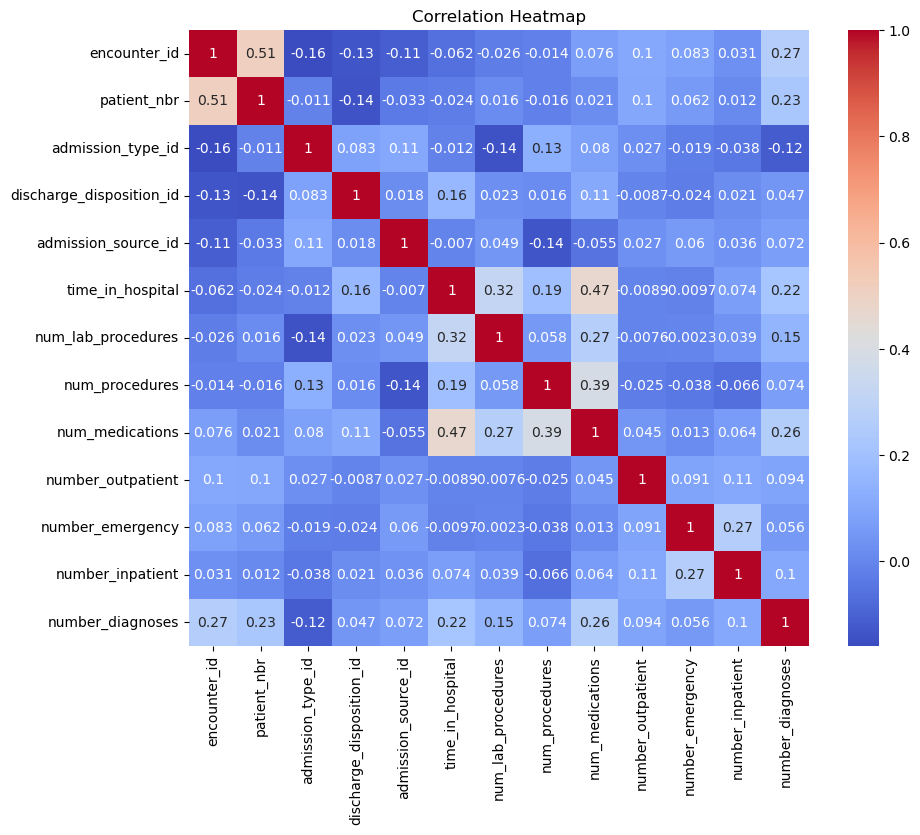

In [11]:
# Heatmap for correlation between variables
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define features and target
X = data_cleaned.drop('readmitted', axis=1)
y = data_cleaned['readmitted']

# Encode categorical variables and standardize numerical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load and preprocess the data
# This step assumes the data has already been loaded and preprocessed

# Define the features and target variable
X = data_cleaned.drop('readmitted', axis=1)
y = data_cleaned['readmitted']

# Encode categorical variables and standardize numerical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)


Confusion Matrix:
 [[  65  862 1358]
 [  73 2746 4298]
 [  47 1858 9047]]

Classification Report:
               precision    recall  f1-score   support

         <30       0.35      0.03      0.05      2285
         >30       0.50      0.39      0.44      7117
          NO       0.62      0.83      0.71     10952

    accuracy                           0.58     20354
   macro avg       0.49      0.41      0.40     20354
weighted avg       0.55      0.58      0.54     20354



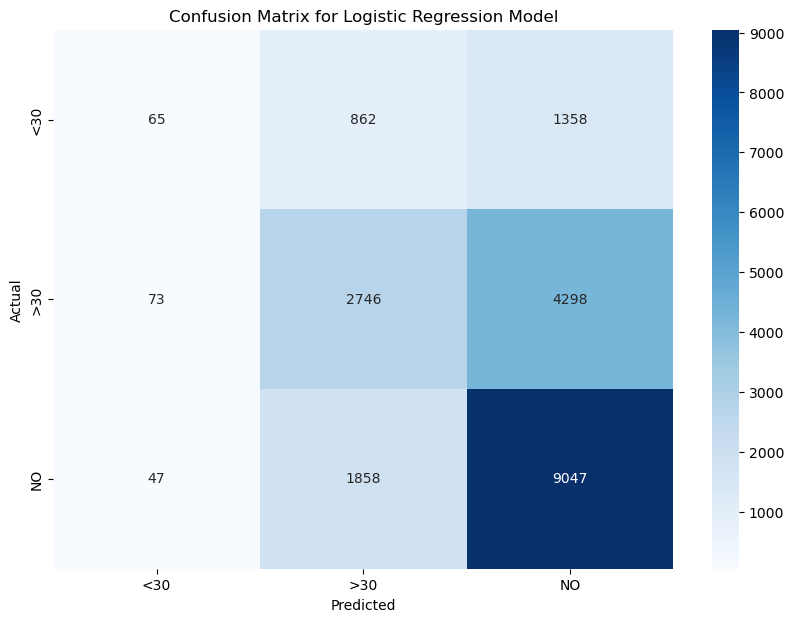

In [14]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Generate the classification report
class_report = classification_report(y_test, y_pred_log_reg)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Create a heatmap plot
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

We can see that a lot of key performance metrics are assessed from the above evaluation for the logistic regression model trained on the preprocessed dataset.

The model's accuracy is approximately 58% on the test set, proving that it correctly predicted the readmission status for about 58% of the cases. This accuracy is a basic understanding of the model's overall performance.

Model's performance is further explained by the confusion matrix:
Rows: 
First row - 
    Cases predicted for readmission in less than 30 days
Second row - 
    Cases predicted for readmission in greater than 30 days
Third row - 
    Cases predicted for no readmission

Columns:
First Column - 
    Actual Cases predicted for readmission in less than 30 days
Second Column - 
    Actual Cases predicted for readmission in greater than 30 days
Third Column - 
    Actual Cases predicted for no readmission
    
Detailed Analysis
First Row: predicted for readmission in less than 30 days
    - 65 cases were correctly predicted as readmitted in less than 30 days(True 
    Positives for <30 days)
    - 862 cases were incorrectly predicted as readmitted in less than 30 days, 
    but were actually readmitted in greater than 30 days(False Positives for 
    <30 days, True Positives for > 30 days)
    - 1358 cases were incorrectly predicted as readmitted in less than 30 days, 
    but were acutally not readmitted (False Positives for <30 days, True 
    positives for No readmission)

Second Row: predicted for readmission in greater than 30 days
    - 73 cases were incorrectly predicted as readmitted in greater than 30 
    days, but were actually readmitted in less than 30 days (False Positives 
    for >30 days, True Positives for <30 days)
    - 2746 cases were correctly predicted as readmitted in greater than 30 
    days(True Positives for > 30 days)
    - 4298 cases were incorrectly predicted as readmitted in greater than 30 
    days, but were acutally not readmitted (False Positives for >30 days, True 
    positives for No readmission)

Third Row: predicted for no readmission
    - 47 cases were incorrectly predicted as no readmission, but were actually 
    readmitted in less than 30 days (False Negatives for No readmission,
    True Positives for <30 days)
    - 1858 cases were incorrectly predicted as no readmission, but were 
    actually readmitted in greater than 30 days(False Negatives for No 
    readmission, True Positives for >30 days)
    - 9047 cases were correctly predicted as no readmission(True Negatives)

Conclusion:
    Even though the model is highly accurate for No Readmission case 
    prediction (9047 correct out of a total of 10952 predictions for no 
    readmission), the model significantly misclassified between "less than 30 
    days and greater than 30 days readmissions" (862+1358+73+4298). This 
    indicates the model still weak in distinguishing between different types of 
    readmission. This could be due to the class imbalance caused by the high 
    number of no readmission cases compared to the readmission cases. 

Recommendations:
    Advanced feature engineering techniques need to be explored to better 
    distinguish between less than 30 days and greater than 30 days 
    readmissions.
    Techniques like oversampling/undersampling or adjusting class weights could 
    help mitigate the impact of class imbalance on model performance.
    Hyperparameters such as regularization strength or solver-type are needed 
    to be optimized to improve the model's performance. Grid search or 
    Randomized search can be used to find different parameter combinations.
    Random forest or Gradient Boosting algorithms can be considered to capture 
    the complex relationship in the data. Ensemble methods can improve the 
    model performence by leveraging the multiple models strengths.

In [15]:
#Random Forest model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv(r'C:\Users\raghu\Downloads\Veera DS\DSC630\diabetic_data.csv')

# Drop columns that are not useful for classification
df = df.drop(columns=['encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'])

# Handle missing values
df = df.dropna()  # For simplicity, drop rows with missing values

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.35      0.02      0.04      3425
           1       0.48      0.40      0.43     10644
           2       0.62      0.81      0.70     16461

    accuracy                           0.58     30530
   macro avg       0.48      0.41      0.39     30530
weighted avg       0.54      0.58      0.53     30530



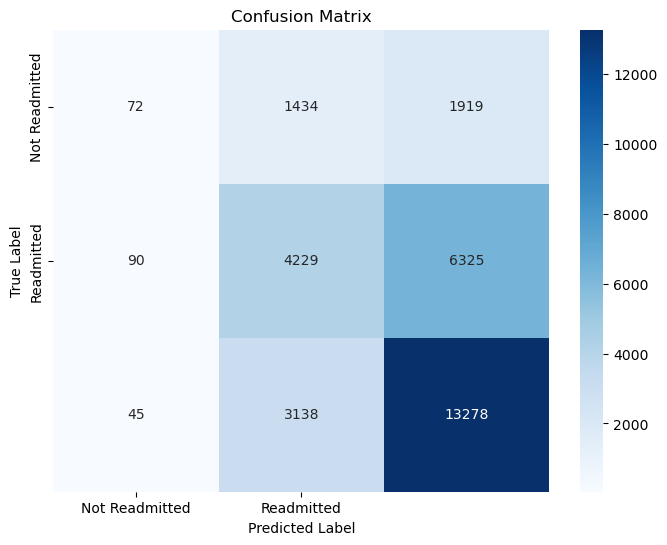

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


True 'Not Readmitted':
Out of all the true instances of 'Not Readmitted', 72 were correctly predicted as 'Not Readmitted' amd 1434 were predicted as 'Readmitted'

True 'Readmitted':

Out of all the true instances of 'Readmitted', 90 were predicted as 'Not Readmitted' and 4229 were correctly predicted as 'Readmitted'


In [17]:
print (cm)

[[   72  1434  1919]
 [   90  4229  6325]
 [   45  3138 13278]]
